In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
root = '/Volumes/Festplatte/data-UA/'
data_path = root + 'data/'
president = 'trump'
cities = ['Birmingham', 'LA', 'London', 'NYC']
years = [str(year) for year in range(2018, 2023)] # ['2018', '2019', '2020', '2021', '2022']
boris_johnson_hashtags = ('BorisJohnson', 'UKPrimeMinister', 'ToryLeader', 'Boris')
donald_trump_hashtags = ('DonaldTrump', 'Trump2024', 'MakeAmericaGreatAgain', 'Trump')
president_hashtags = donald_trump_hashtags if president == 'trump' else boris_johnson_hashtags
def get_files(dir):
    """ get all files from a directory 
    that do not start with a '.'
    :param dir: String
    :return: List of Strings
    """
    return sorted([s for s in os.listdir(dir) if not s.startswith('.')])

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

def db_select(conn, table, limit, select = '*', where = 'True'):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute(f'SELECT {select} FROM {table} WHERE {where} LIMIT {limit}')

    rows = cur.fetchall()

    for row in rows:
        print(row)

In [3]:
# create columns
years = range(2018, 2023)  # 2023 is exclusive, so it includes up to 2022
months = range(1, 13)  # 12 months
formatted_dates = [f'{year}-{month:02d}' for year in years for month in months]

compound_sentiment = pd.DataFrame(index=cities, columns=formatted_dates)

In [ ]:
for city in ['Birmingham']:
    for year in ['2018']:
        for month in get_files(f'{data_path}'):

In [13]:
compound_col = 'Compound'
for db_file in get_files(f'{data_path}'):
    # get date in the format YYYY-MM
    date_only = db_file[-11:-4]
    # load data
    data = pd.read_pickle(data_path + db_file)
    # check if data has respective column
    assert compound_col in data.columns
    city = db_file.split('-')[0]
    # check if the city was extracted correctly
    assert city in cities
    # save the monthly compounded graded sentiment scoring in the compound_sentiment overview
    compound_sentiment.at[city, date_only] = data[compound_col].mean()

In [14]:
compound_sentiment

,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
Birmingham,-0.025664,-0.059763,-0.038739,-0.040105,-0.066766,-0.070282,-0.040641,0.035691,0.055561,0.015622,...,0.03225,0.026898,0.092077,0.06503,-0.051493,NaN,NaN,NaN,NaN,NaN
LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.04293,-0.029661,-0.086834,...,-0.014101,-0.018561,-0.065088,-0.050225,NaN,NaN,NaN,NaN,NaN,NaN
London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013491,0.033352,-0.001808,...,0.022516,0.079955,0.04888,0.005162,-0.013885,NaN,NaN,NaN,NaN,NaN
NYC,-0.025664,-0.059763,-0.038739,-0.040105,-0.066766,-0.070282,-0.040641,-0.052311,-0.029729,-0.090032,...,-0.073291,-0.037125,-0.049943,-0.048857,-0.051493,NaN,NaN,NaN,NaN,NaN


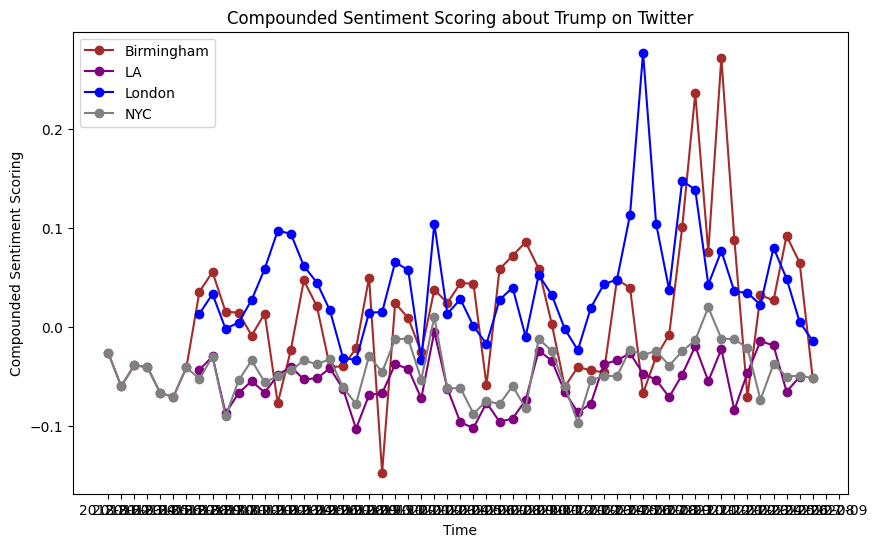

In [25]:
plt.figure(figsize=(10, 6))

# Plot each dimension
colors = ['brown', 'purple', 'blue', 'gray']
for i in range(len(cities)):
    plt.plot(compound_sentiment.loc[cities[i]], label=cities[i], color=colors[i], marker='o')

# Adding titles and labels
plt.title(f'Compounded Sentiment Scoring about {president.capitalize()} on Twitter')
plt.xlabel('Time')
plt.ylabel('Compounded Sentiment Scoring')

# Adding a legend
plt.legend()

# Display the plot
plt.show()
